In [22]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [23]:
import sys
sys.path.append("..")

In [24]:
import xgboost

from src.utils import seed_everything, read_data
from src.models.metrics import wpe_10, wpe_20, proper_ordering, one_tail_accuracy, classification_accuracy

In [25]:
SEED = seed_everything(357)

wczytujemy model

In [26]:
model = xgboost.XGBRegressor()
model.load_model('../models/xgboost.json')

wczytujemy dane testowe

In [42]:
X_train, y_train = read_data("../data/processed/data_train_NEW.csv")

In [27]:
X_test, y_test = read_data("../data/processed/data_test_NEW.csv")

In [31]:
X_val, y_val = read_data("../data/processed/data_val_NEW.csv")

tworzymy funkcje pomocniczą (bo nasz model aktualnie predyktuje wartości Y równe np.log10(Y + 1), więc musimy z nimi "wrócić")

In [28]:
predict = lambda model, data: 10 ** model.predict(data) - 1

In [29]:
y_preds = predict(model, X_test)

/home/qba/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [34]:
y_preds_val = predict(model, X_val)

In [43]:
y_preds_train = predict(model, X_train)

/home/qba/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


teraz seria metryk

In [35]:
wpe_10(y_test, y_preds)

41.8

In [36]:
wpe_20(y_test, y_preds)

64.97500000000001

In [37]:
proper_ordering(y_test, y_preds)

82.07643160790198

In [38]:
wpe_10(y_val, y_preds_val)

91.025

In [39]:
wpe_20(y_val, y_preds_val)

96.3

In [40]:
proper_ordering(y_val, y_preds_val)

95.63845961490372

In [44]:
wpe_10(y_train, y_preds_train)

90.78333333333333

In [45]:
wpe_20(y_train, y_preds_train)

95.775

In [46]:
proper_ordering(y_train, y_preds_train)

95.5216615273495

Text(0, 0.5, '')

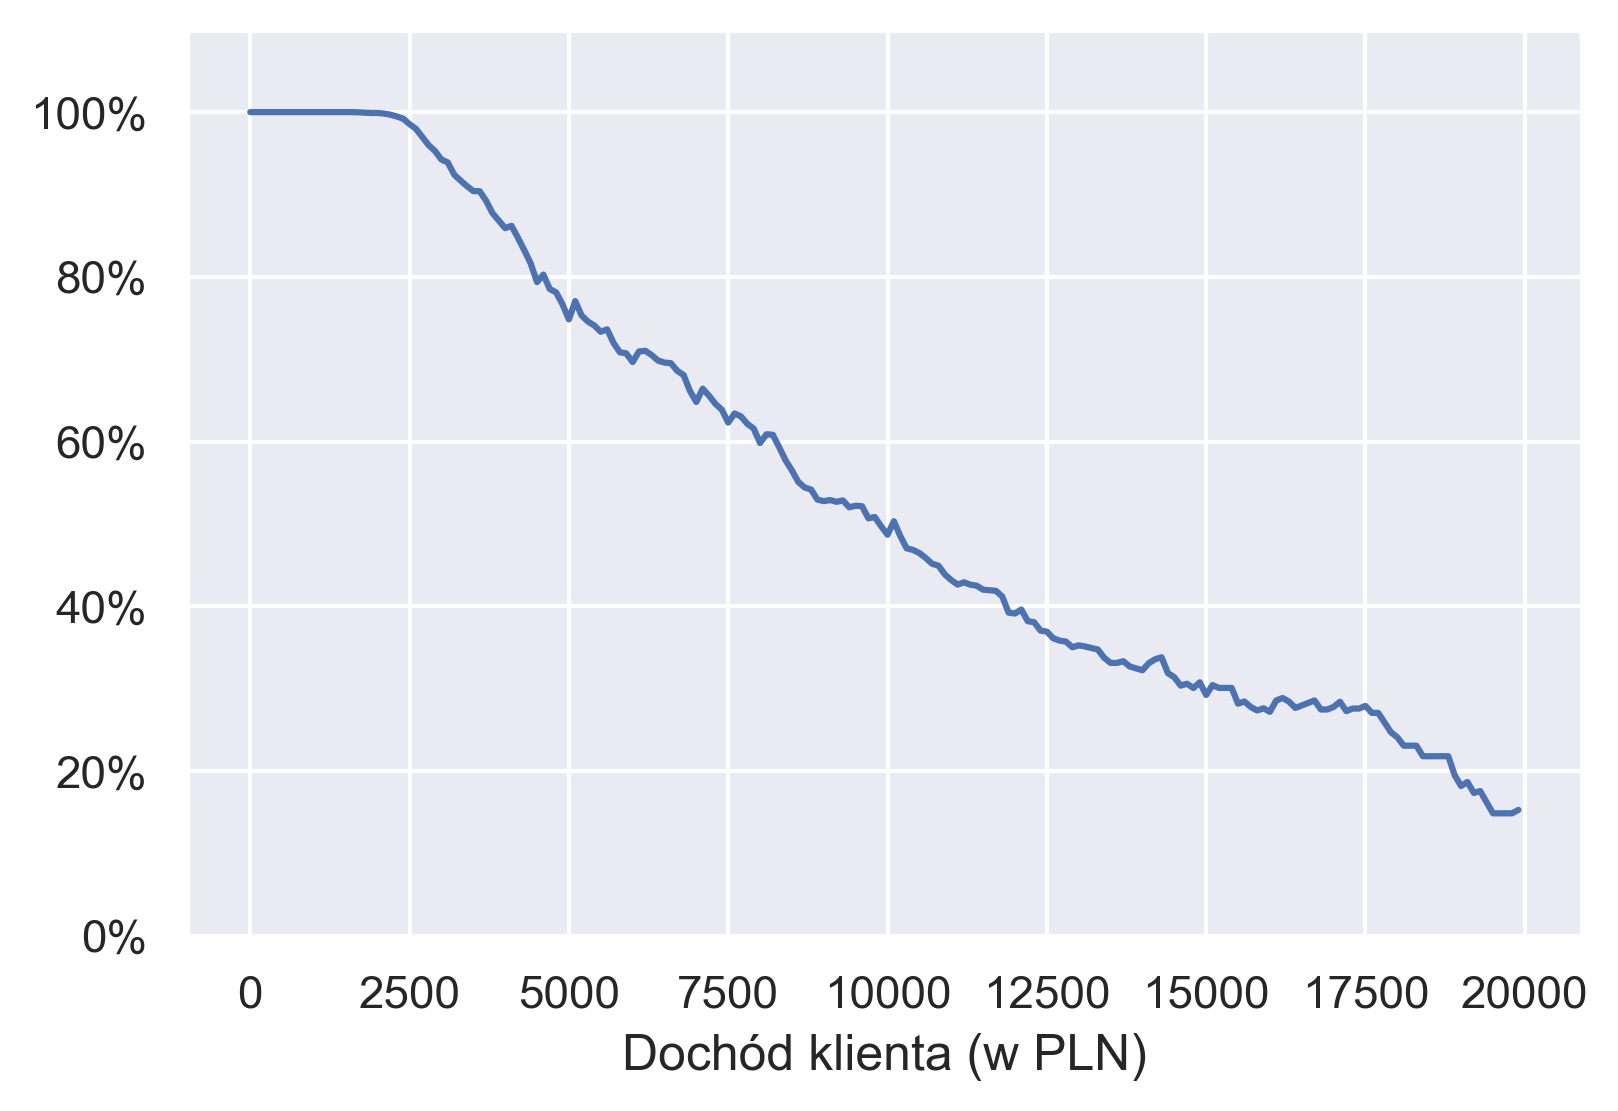

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.figure(dpi=300)
ax = sns.lineplot(x=list(range(0, end, step)), y=one_tail_accuracies)
import matplotlib.ticker as mtick

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.ylim([0, 110])
plt.xlabel('Dochód klienta (w PLN)')
plt.ylabel('')

Text(0, 0.5, '')

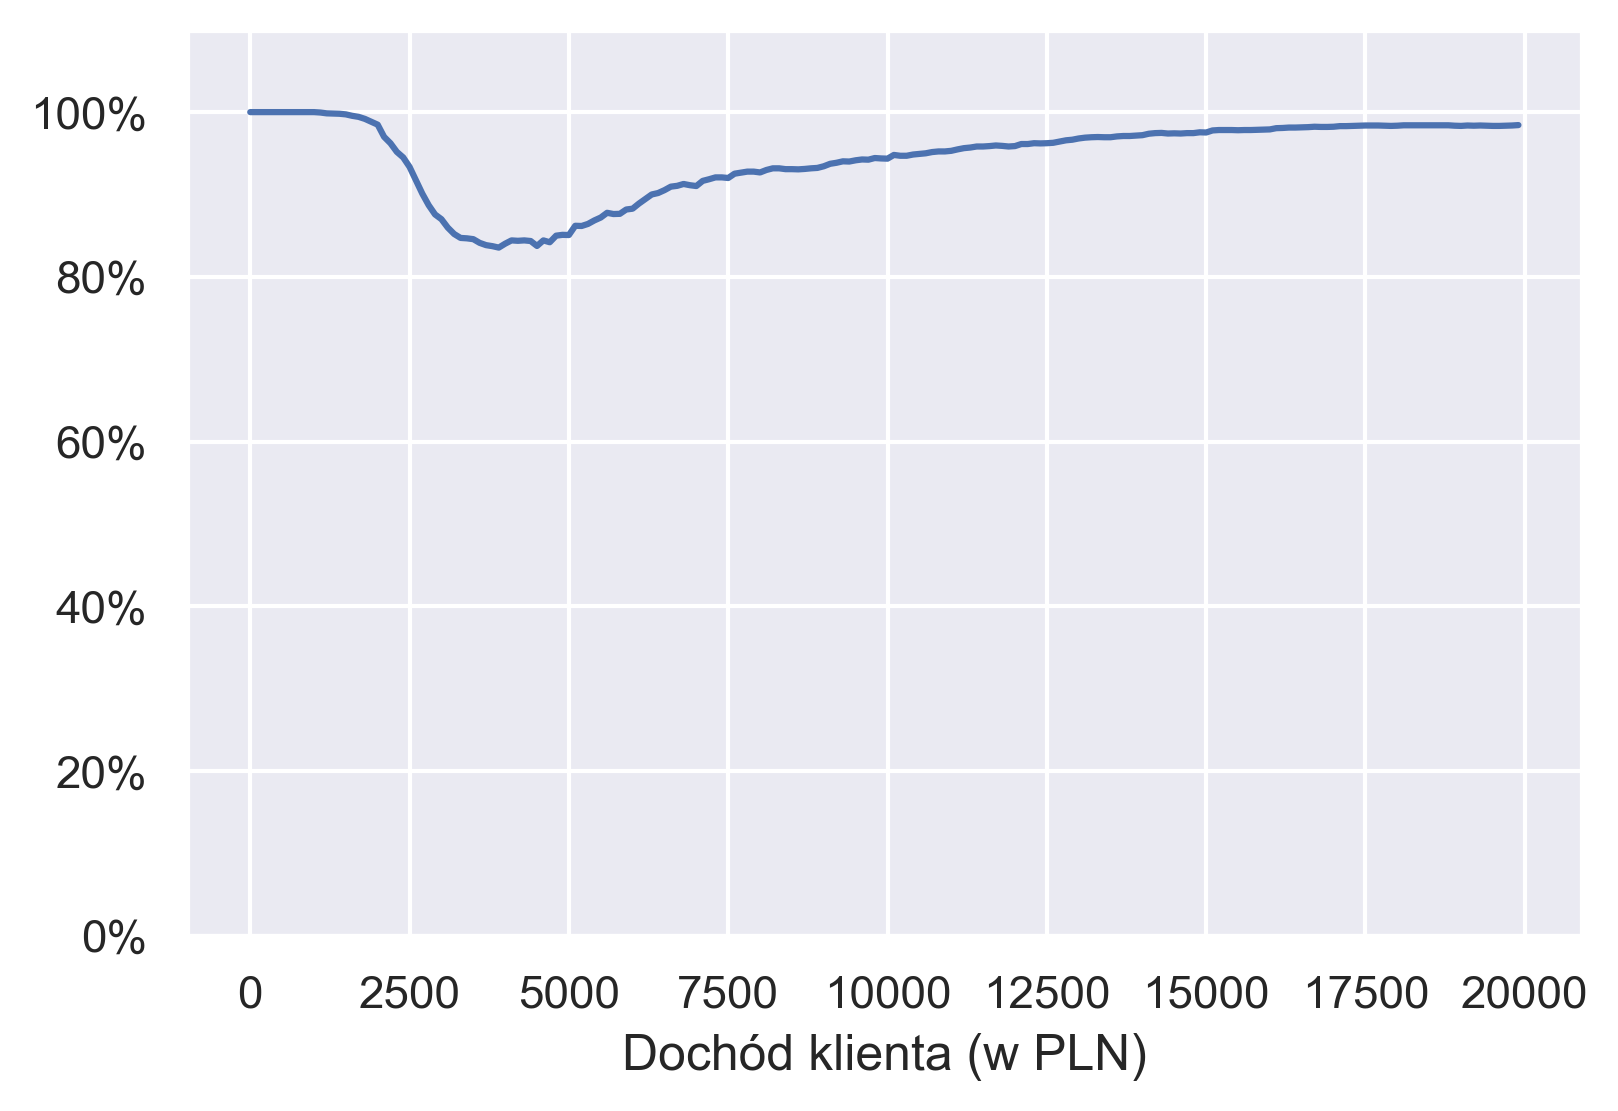

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
plt.figure(dpi=300)
ax = sns.lineplot(x=list(range(0, end, step)), y=clf_accuracies)
import matplotlib.ticker as mtick

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.ylim([0, 110])
plt.xlabel('Dochód klienta (w PLN)')
plt.ylabel('')

In [52]:
colors = ["#8bdcbe", "#f05a71", "#371ea3", "#46bac2", "#ae2c87", "#ffa58c", "#4378bf"]

<AxesSubplot:>

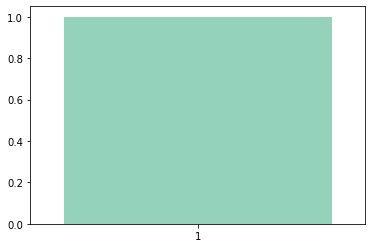

In [56]:
import seaborn as sns
sns.barplot(x = [1], y = [1], color = colors[0])